<a href="https://colab.research.google.com/github/Chao-Meng/Python-Binning-and-creating-Histograms/blob/main/binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
df = pd.read_excel('/content/auto-mpg .xlsx')
df.shape
df
# df.isnull().sum()

(98, 10)

In [ ]:
# 1. Drop the 'Origin' column (assuming it was part of the dataset; if not, adjust accordingly)
# df.drop('Origin', axis=1, inplace=True)

In [36]:
# 2. Find out all the missing values in the dataset and replace it with its most
# appropriate replacement.
# Finding out missing values: We can use .sum() method after
# applying .isnull() this will return sum of missing values within each columns in the dataframe.
# import pandas as pd
# df = pd.read_csv('IMDB-Movie-Data.csv') df.isnull().sum()
df.isnull().sum()
# 数字表示缺失数
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,L/100km,horsepower_bins,horsepower_bin,horsepower_zscore
0,8,307.0,130,0.536150,12.0,70.0,1,chevrolet chevelle malibu,L6V 043,13.067500,Medium,Medium,-0.021463
1,8,350.0,165,0.589736,11.5,70.0,1,buick skylark 320,RTY079,15.681000,High,Medium,0.714718
2,8,318.0,150,0.516870,11.0,70.0,1,plymouth satellite,MTP600,13.067500,Medium,Medium,0.399212
3,8,304.0,150,0.516019,12.0,70.0,1,amc rebel sst,MNJ000,14.700938,Medium,Medium,0.399212
4,8,302.0,140,0.520556,10.5,70.0,1,ford torino,JEETMEET,13.836176,Medium,Medium,0.188874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,8,318.0,150,0.743975,14.5,73.0,1,plymouth fury gran sedan,FGTEE4,16.801071,Medium,Medium,0.399212
94,8,440.0,215,0.885172,11.0,73.0,1,chrysler new yorker brougham,GTTYR6,18.093462,High,High,1.766405
95,8,455.0,225,0.946413,11.0,73.0,1,buick electra 225 custom,TTGGT53,19.601250,High,High,1.976742
96,8,360.0,175,0.626028,11.0,73.0,1,amc ambassador brougham,TGTYY67,18.093462,High,High,0.925055


In [7]:
# 3.Find and remove duplicate entries for the column ‘ CAR Number’
df.drop_duplicates(subset='CAR Number', keep='first', inplace=True)


In [58]:
import pandas as pd
import numpy as np


rows_without_nan = df.dropna()

#
rows_with_nan = df[~df.index.isin(rows_without_nan.index)]
print(rows_with_nan)
# df.dtypes




    L/100km  cylinders  displacement  horsepower  weight  acceleration  \
9        15          8         390.0         190    3850           8.5   
21       24          4         107.0          90    2430           NaN   
26       10          8         307.0         200    4376          15.0   
29       27          4          97.0          88    2130          14.5   
32       25          4          98.0          80    2046          19.0   
45       18          6         258.0         110    2962          13.5   
52       30          4          88.0          76    2065          14.5   
53       31          4          71.0          65    1773           NaN   
54       35          4          72.0          69    1613          18.0   
56       26          4          91.0          70    1955          20.5   
73       13          8         307.0         130    4098          14.0   

    model year  origin                          car name CAR Number  \
9         70.0       1                am

In [12]:
# 4. Get the basic insights:
# ✔ Display the first five and last five rows
print(df.head())
print(df.tail())

# ✔ Display all the column names in the dataset
print(df.columns)

# ✔ Display the concise summary of your dataset
df.info()

# ✔ Display the name of the car with maximum number of horsepower.
# ensure horsepower is a numeric column; if it's not, need to convert it
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
max_hp_car = df[df['horsepower'] == df['horsepower'].max()]['car name'].iloc[0]
print(f"The car with the maximum horsepower is: {max_hp_car}")


   mpg  cylinders  displacement  horsepower  weight  acceleration  model year  \
0   18          8         307.0         130    3504          12.0        70.0   
1   15          8         350.0         165    3693          11.5        70.0   
2   18          8         318.0         150    3436          11.0        70.0   
3   16          8         304.0         150    3433          12.0        70.0   
4   17          8         302.0         140    3449          10.5        70.0   

   origin                   car name CAR Number  
0       1  chevrolet chevelle malibu    L6V 043  
1       1          buick skylark 320     RTY079  
2       1         plymouth satellite     MTP600  
3       1              amc rebel sst     MNJ000  
4       1                ford torino   JEETMEET  
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
93   14          8         318.0         150    4237          14.5   
94   13          8         440.0         215    4735          11.0   
95 

In [44]:
#5. In our dataset, the fuel consumption column is "mpg" and is represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts fuel consumption with the L/100km standard. change the name of the column to "L/100km".
# df['L/100km'] = 235.215 / df['mpg']
df.rename(columns={"mpg":"L/100km"},inplace=True)
df


,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,L/100km
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043,13.067500
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079,15.681000
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600,13.067500
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000,14.700938
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET,13.836176
...,...,...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,1,plymouth fury gran sedan,FGTEE4,16.801071
94,13,8,440.0,215,4735,11.0,73.0,1,chrysler new yorker brougham,GTTYR6,18.093462
95,12,8,455.0,225,4951,11.0,73.0,1,buick electra 225 custom,TTGGT53,19.601250
96,13,8,360.0,175,3821,11.0,73.0,1,amc ambassador brougham,TGTYY67,18.093462


In [25]:
# 6. Normalize the column “Weight” so that the values range from 0 to 1

df['weight'] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())

df['weight']

0     0.536150
1     0.589736
2     0.516870
3     0.516019
4     0.520556
        ...   
93    0.743975
94    0.885172
95    0.946413
96    0.626028
97    0.427559
Name: weight, Length: 98, dtype: float64

In [ ]:
# 7. Normalization is the process of transforming values of several variables into a
# similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
df['weight'] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())


In [26]:
# 8. Approach: replace original value by (original value)/(maximum value)
df['weight'] = df['weight'] / df['weight'].max()
df['weight']

0     0.536150
1     0.589736
2     0.516870
3     0.516019
4     0.520556
        ...   
93    0.743975
94    0.885172
95    0.946413
96    0.626028
97    0.427559
Name: weight, Length: 98, dtype: float64

In [27]:
# 9. In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it
# has 57 unique values. What if we only care about the price difference between
# cars with high horsepower, medium horsepower, and little horsepower (3
# types)? Can we rearrange them into three ‘bins' to simplify analysis?
percentiles = df['horsepower'].quantile([0.33, 0.66]).values

# Create bins: low, medium, high
bin_edges = [48, percentiles[0], percentiles[1], 288]
#looks like 48 and 288 are the min and max values for horsepower
bin_labels = ['Low', 'Medium', 'High']
df['horsepower_bins'] = pd.cut(df['horsepower'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Check the first few rows to verify
print(df[['horsepower', 'horsepower_bins']].head())

   horsepower horsepower_bins
0         130          Medium
1         165            High
2         150          Medium
3         150          Medium
4         140          Medium


In [47]:
# 10. We will use the Pandas method 'cut' to segment the 'horsepower' column into 3
# bins

# Ensure 'horsepower' is numeric, converting any non-numeric values to NaN (if necessary)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Use cut to segment 'horsepower' into 3 bins
df['horsepower_bin'] = pd.cut(df['horsepower'], bins=3, labels=['Low', 'Medium', 'High'])

# Display the first few rows to verify
print(df[['horsepower', 'horsepower_bin']].head())



   horsepower horsepower_bin
0         130         Medium
1         165         Medium
2         150         Medium
3         150         Medium
4         140         Medium


<Axes: >

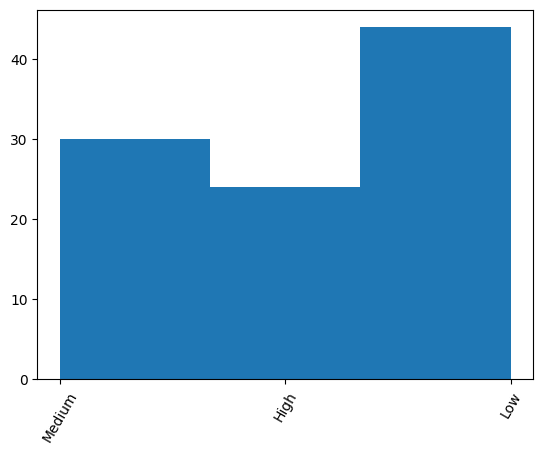

In [66]:
# 11. Use a histogram to visualize the distribution of bins we created above.
df['horsepower_bin'].hist(grid=False, xrot=60, bins=len(df['horsepower_bin'].unique()))



In [33]:
# 12. Detect outliers using Z-score and remove them
from scipy import stats
import numpy as np

# Calculating Z-scores
df['horsepower_zscore'] = stats.zscore(df['horsepower'])

# Display the first few rows to verify
print(df.head())
# Filtering out the outliers
df_no_outliers = df[np.abs(df['horsepower_zscore']) <= 3]

# now drop the Z-score column if you don't need it anymore
df_no_outliers = df_no_outliers.drop(columns=['horsepower_zscore'])

# Display the shape or a sample of the DataFrame to verify
print(df_no_outliers.shape)



   cylinders  displacement  horsepower    weight  acceleration  model year  \
0          8         307.0         130  0.536150          12.0        70.0   
1          8         350.0         165  0.589736          11.5        70.0   
2          8         318.0         150  0.516870          11.0        70.0   
3          8         304.0         150  0.516019          12.0        70.0   
4          8         302.0         140  0.520556          10.5        70.0   

   origin                   car name CAR Number    L/100km horsepower_bins  \
0       1  chevrolet chevelle malibu    L6V 043  13.067500          Medium   
1       1          buick skylark 320     RTY079  15.681000            High   
2       1         plymouth satellite     MTP600  13.067500          Medium   
3       1              amc rebel sst     MNJ000  14.700938          Medium   
4       1                ford torino   JEETMEET  13.836176          Medium   

  horsepower_bin  horsepower_zscore  
0         Medium        